## Promotional Analysis

This analysis aims to find if there's any statistical relationship between
- Promotions and Sales
- Markdowns and Sales

This is a continuation of the analysis from here [Exploratory Analysis](https://datastudio.google.com/u/0/reporting/69f327c1-22a4-4164-b0c1-d8895bfde7e2/page/tEnnC/edit)

#### Results

- **Relationship between promotions and sales** <br>
From exploratory analysis in the jupyter notebook it was evident that there were higher sales on promotion days. We were able to corroborate the same using a statistical test(t-test)

- **There seems to be a weak or no relationship between the markdowns and sales at an overall level** <br>
Higher markdown on SKUs dont seem to drive higher sales at an overall level, which was very counter intuitive. A little deep-dive explained why that would happen. Majority of the items at the home depot are low cost items hence the overall data is biased towards low cost items.

- **There are high cost SKUs that are sensitive to markdowns** <br>
Looking only at high cost SKUs and their correlation makes it evident that there are SKUs sensitive to markdowns


#### Next Steps
- Work with Pooja/Reuben to overlay the results with the pricing data

### Read Files

In [1]:
from teamUtils import BQ_User # Pricing Analytics package we just installed
from shapely.wkt import loads
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_columns",100)

In [3]:
home_project='analytics-askuity-thd' # Make this the project you use in your everyday work, for example Jared would use analytics-pricing-thd
bq = BQ_User(project_name=home_project)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=262006177488-3425ks60hkk80fssi9vpohv88g6q1iqd.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=ZI0N4RENjYD6wLQLhr374LBI3iHNXg&access_type=offline


Unable to create credentials directory.


In [4]:
## This does not work, use the script to generate dataset!

# sql_3 = """SELECT
#   *
# FROM
#   `analytics-askuity-thd.sid_workspace.SALES_PROMO_2022_TBL`
# WHERE
#   SKU_NBR IN (
#   SELECT
#     DISTINCT SKU_NBR
#   FROM
#     `analytics-askuity-thd.sid_workspace.SALES_PROMO_2022_TBL`
#   ORDER BY
#     RAND()
#   LIMIT
#     50000)"""

# data = bq.SQL.to_df(sql_3)

In [5]:
data = pd.read_csv("promotions.csv")

/var/folders/z2/rdt7vxy91fz7f7gkqbtqbgk40000gn/T/ipykernel_60258/3367979110.py:1: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("promotions.csv")


In [6]:
data.head()

,SKU_NBR,SKU_DESC,STR_NBR,SLS_DT,MVNDR_NBR,TY_SLS,TY_SLS_UNITS,TY_RETURNS,TY_RETURN_UNITS,PROMO_ID,PROMO_RTL_AMT,PROMO_NM,PROMO_TYP,PROMO_S_DESC,PROMO_DESC,SRC_PROMO_BGN_TS,SRC_PROMO_END_TS,MKUP_MKDN_AMT,MKUP_MKDN_PCT,EFF_RTL_AMT,SRC_EFF_BGN_TS,SRC_EFF_END_TS,SRC_LAST_UPD_TS,CLR_FLG,SRC_DEL_FLG,SRC_DEL_DT
0,1004603574,NaN,6877,2022-07-10,751001,11.97,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,703311,NaN,441,2022-07-31,516279,14.97,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000236729,NaN,170,2022-07-23,24046,51.47,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1005645914,NaN,1171,2022-01-09,102527,12.48,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1002275742,NaN,1942,2022-04-17,16635,11.25,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.shape

(99367411, 26)

### Understanding data

In [8]:
#Check how may SKUs are there
print(f"The unique number of SKUs in the data are {data.SKU_NBR.drop_duplicates().count()}")
#Print the number of stores
print(f"The unique number of stores in the data are {data.STR_NBR.drop_duplicates().count()} ")

The unique number of SKUs in the data are 50000
The unique number of stores in the data are 1997 


/var/folders/z2/rdt7vxy91fz7f7gkqbtqbgk40000gn/T/ipykernel_60258/2725220813.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data.groupby('STR_NBR')['SKU_NBR'].nunique().sort_values(ascending=False)[0:10].plot.bar()


<AxesSubplot: xlabel='STR_NBR'>

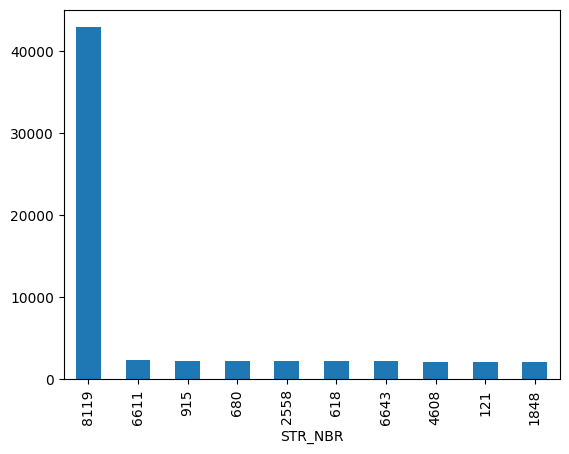

In [9]:
# Stores that have the most number of SKUs
data.groupby('STR_NBR')['SKU_NBR'].nunique().sort_values(ascending=False)[0:10].plot.bar()

Need to look closely at the store number 8119

In [10]:
data['SLS_DT'] = pd.to_datetime(data['SLS_DT'])

In [11]:
# Number of SKUs rows with promotions

print(f"The number of unique SKUs with atleast one promotional event {data[data.PROMO_ID.notnull()].SKU_NBR.nunique()}")


The number of unique SKUs with atleast one promotional event 7530


In [12]:
# Proportion of transactions that have promotions
# Only 2% of the transactions have promotions on them
print(f"{data[data.PROMO_ID.notnull()].shape[0]/data.shape[0]:.4f}")

0.0199


In [23]:
#Ratio of SKUs that have both promotional as well as not promotional events

SKU_promos = data[data.PROMO_ID.notnull()].SKU_NBR
# Promo SKUs that also have non promotional events
SKU_promos = data[(data.SKU_NBR.isin(SKU_promos)) & (data.PROMO_ID.isnull())].SKU_NBR

print(f"SKUs that have atleast one promotional and atleast one non promotion event in this analysis are {SKU_promos.nunique()}")

print(f"And the proportion of such SKUs is {SKU_promos.nunique()/50000}")

SKUs that have atleast one promotional and atleast one non promotion event in this analysis are 6485
And the proportion of such SKUs is 0.1297


In [14]:
# Average MKDN for promotional events
data[data.PROMO_ID.notnull()]['MKUP_MKDN_PCT'].mean()
# Average sales volume during promotion time vs non-promotional instances

20.9102975430921

In [16]:
#Creating a promotional flag
df = data.assign(PROMO_FLAG = data['PROMO_ID'].notnull())
df.head()

,SKU_NBR,SKU_DESC,STR_NBR,SLS_DT,MVNDR_NBR,TY_SLS,TY_SLS_UNITS,TY_RETURNS,TY_RETURN_UNITS,PROMO_ID,PROMO_RTL_AMT,PROMO_NM,PROMO_TYP,PROMO_S_DESC,PROMO_DESC,SRC_PROMO_BGN_TS,SRC_PROMO_END_TS,MKUP_MKDN_AMT,MKUP_MKDN_PCT,EFF_RTL_AMT,SRC_EFF_BGN_TS,SRC_EFF_END_TS,SRC_LAST_UPD_TS,CLR_FLG,SRC_DEL_FLG,SRC_DEL_DT,PROMO_FLAG
0,1004603574,NaN,6877,2022-07-10,751001,11.97,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,703311,NaN,441,2022-07-31,516279,14.97,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,1000236729,NaN,170,2022-07-23,24046,51.47,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,1005645914,NaN,1171,2022-01-09,102527,12.48,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,1002275742,NaN,1942,2022-04-17,16635,11.25,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [17]:
df['TY_SLS'] = df['TY_SLS'].astype('float')

### Statistical Tests

In [24]:
# We see a relationship between Sales and Promotions
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(df[df.PROMO_FLAG]['TY_SLS'].astype('float'), df[~df.PROMO_FLAG]['TY_SLS'].astype('float'))
print("T-statistic value: ", t_stat)
print(f"P-Value: {p_value:.6f}")

T-statistic value:  873.7496500808596
P-Value: 0.000000


<AxesSubplot: xlabel='PROMO_FLAG', ylabel='Average Sales'>

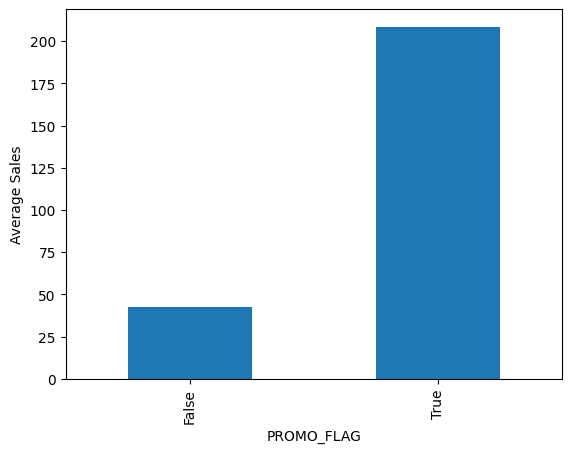

In [28]:
df.groupby('PROMO_FLAG').TY_SLS.mean().plot.bar(ylabel='Average Sales')

### Correlation between markdowns and sales

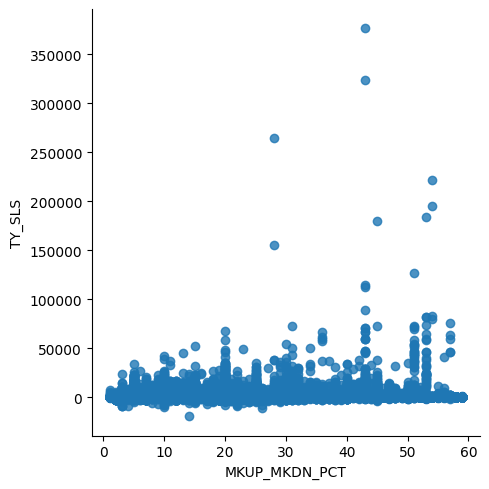

In [19]:
# There seems to be no correlation
import seaborn as sns
sns.lmplot(x='MKUP_MKDN_PCT',y='TY_SLS',data=df[(0<df.MKUP_MKDN_PCT) & (df.MKUP_MKDN_PCT<60)],fit_reg=True) 

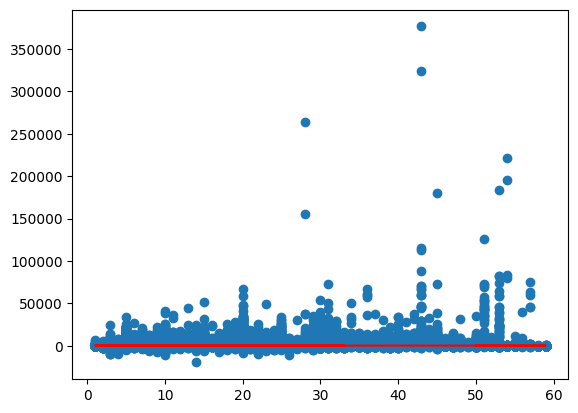

In [32]:
#Confirming it with a linear model
from sklearn.linear_model import LinearRegression
df_model = df[(0<df.MKUP_MKDN_PCT) & (df.MKUP_MKDN_PCT<60) & (df.PROMO_FLAG)][['MKUP_MKDN_PCT', 'TY_SLS']].dropna()
X = df_model.loc[:, 'MKUP_MKDN_PCT'].values.reshape(-1, 1)  # iloc[:, 1] is the column of X
Y = df_model.loc[:, 'TY_SLS'].values.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

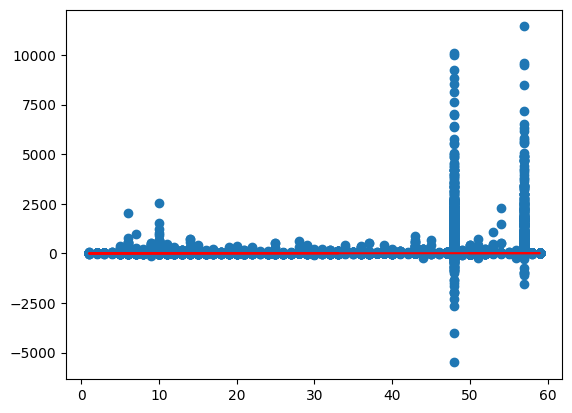

In [33]:
#Confirming it with a linear model
from sklearn.linear_model import LinearRegression
df_model = df[(0<df.MKUP_MKDN_PCT) & (df.MKUP_MKDN_PCT<60)& (df.PROMO_FLAG)]\
             [['MKUP_MKDN_PCT', 'TY_SLS_UNITS']].dropna()

X = df_model.loc[:, 'MKUP_MKDN_PCT'].values.reshape(-1, 1)  # iloc[:, 1] is the column of X
Y = df_model.loc[:, 'TY_SLS_UNITS'].values.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

### Building analysis at SKU level

In [39]:
print(f"Total number of rows are {df.shape[0]}")
df[['MKUP_MKDN_PCT', 'TY_SLS']].corr()

Total number of rows are 99367411


,MKUP_MKDN_PCT,TY_SLS
MKUP_MKDN_PCT,1.000000,0.014321
TY_SLS,0.014321,1.000000


In [38]:
print(f"The number of rows that have promotions are {df[df.PROMO_FLAG].shape[0]}")
df[df.PROMO_FLAG][['MKUP_MKDN_PCT', 'TY_SLS']].corr()

The number of rows that have promotions are 1979225


,MKUP_MKDN_PCT,TY_SLS
MKUP_MKDN_PCT,1.000000,0.014321
TY_SLS,0.014321,1.000000


In [69]:
df_corr = df[df.PROMO_FLAG].groupby('SKU_NBR')[['MKUP_MKDN_PCT', 'TY_SLS']].corr().reset_index()
df_corr.head()

,SKU_NBR,level_1,MKUP_MKDN_PCT,TY_SLS
0,138106,MKUP_MKDN_PCT,1.000000,0.016969
1,138106,TY_SLS,0.016969,1.000000
2,190262,MKUP_MKDN_PCT,1.000000,0.140902
3,190262,TY_SLS,0.140902,1.000000
4,201014,MKUP_MKDN_PCT,1.000000,-0.029969


In [87]:
df_corr_02 = df_corr[(df_corr.TY_SLS>0.5) & (df_corr.level_1!="TY_SLS")]


In [1]:
df_corr_02.head()

NameError: name 'df_corr_02' is not defined

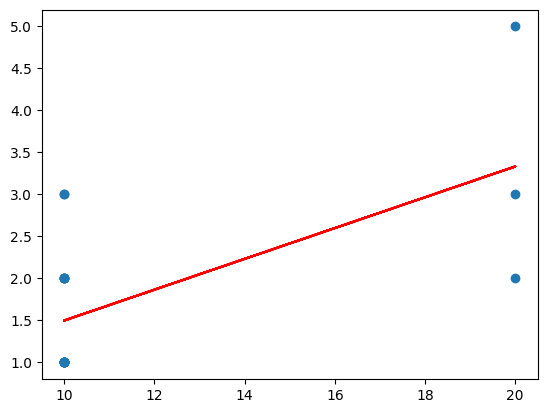

In [93]:
# There seems to be no relationship for a particular SKU as well
from sklearn.linear_model import LinearRegression
df_model = df[(df.MKUP_MKDN_PCT<60) & (df.SKU_NBR==1008655988)]\
             [['MKUP_MKDN_PCT', 'TY_SLS_UNITS']].dropna()

X = df_model.loc[:, 'MKUP_MKDN_PCT'].values.reshape(-1, 1)  # iloc[:, 1] is the column of X
Y = df_model.loc[:, 'TY_SLS_UNITS'].values.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()